In [24]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from scipy import linalg as la
import random
import sys
import scipy.stats as stats



### Plot Entire Timeline Histogram

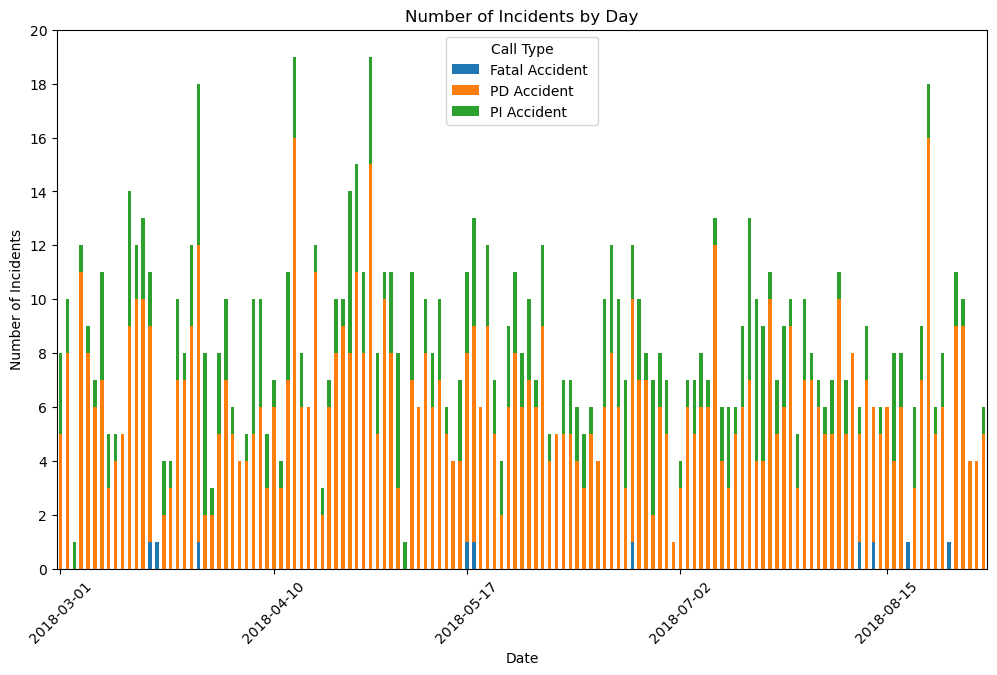

Date
2018-03-01     8.0
2018-03-02    10.0
2018-03-03     1.0
2018-03-04    12.0
2018-03-05     9.0
              ... 
2018-08-27    11.0
2018-08-28    10.0
2018-08-29     4.0
2018-08-30     4.0
2018-08-31     6.0
Name: accident_count, Length: 135, dtype: float64


In [3]:
file_2018 = 'Phase III Combinder_CAD+TS (Mar-August 2018) - Modified RCT.xlsm'

file = file_2018

df = pd.read_excel(file, sheet_name='CAD_TS_Combined')
df = df.drop_duplicates(subset=['Call ID Number'])
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])
df['Date'] = df['Timestamp'].dt.date

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])

# Extract the date from the timestamp
df['Date'] = df['Timestamp'].dt.date
# Group the data by date and type and count the number of accidents
grouped_data = df.groupby(['Date', 'Call Type']).size().reset_index(name='Count')

# Create a pivot table to rearrange the data for plotting
pivot_table = grouped_data.pivot(index='Date', columns='Call Type', values='Count')
pivot_table = pivot_table.fillna(0)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the histogram
pivot_table.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Day')

# Set x-axis tick format to show only each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 21, step=2))
# Show the plot
plt.show()
pivot_table['accident_count'] = pivot_table['Fatal Accident '] + pivot_table['PD Accident    '] + pivot_table['PI Accident    ']
data_2018 = pivot_table['accident_count']
print(data_2018)

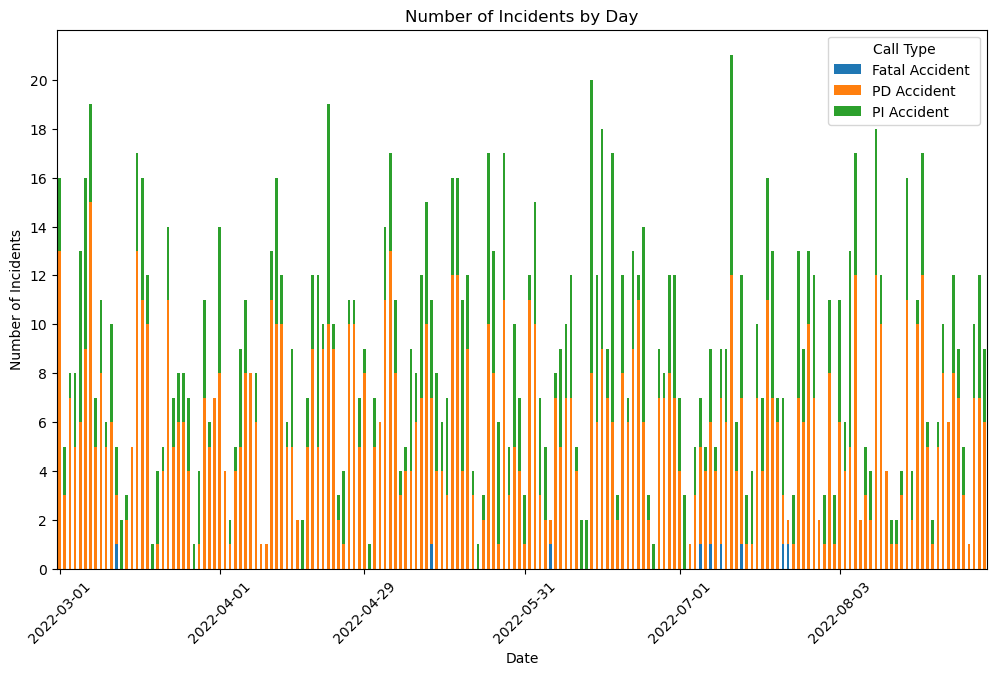

Date
2022-03-01    16.0
2022-03-02     5.0
2022-03-03     8.0
2022-03-04     8.0
2022-03-05    13.0
              ... 
2022-08-27     5.0
2022-08-28     1.0
2022-08-29    10.0
2022-08-30    12.0
2022-08-31     9.0
Name: accident_count, Length: 180, dtype: float64


In [4]:
file_2018 = 'Phase III Combinder_CAD+TS (Mar-August 2018) - Modified RCT.xlsm'
file_2022 = 'Combinder_CAD+TS 2022 All - Modified RCT.xlsm'

file = file_2018
file = file_2022

df = pd.read_excel(file, sheet_name='CAD_TS_Combined')
df = df.drop_duplicates(subset=['Call ID Number'])
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])
df['Date'] = df['Timestamp'].dt.date

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])

# Extract the date from the timestamp
df['Date'] = df['Timestamp'].dt.date
# Group the data by date and type and count the number of accidents
grouped_data = df.groupby(['Date', 'Call Type']).size().reset_index(name='Count')

# Create a pivot table to rearrange the data for plotting
pivot_table = grouped_data.pivot(index='Date', columns='Call Type', values='Count')
pivot_table = pivot_table.fillna(0)

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the histogram
pivot_table.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Day')

# Set x-axis tick format to show only each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 21, step=2))
# Show the plot
plt.show()
pivot_table['accident_count'] = pivot_table['Fatal Accident '] + pivot_table['PD Accident    '] + pivot_table['PI Accident    ']
data_2022 = pivot_table['accident_count']
print(data_2022)


### Plot Incident Count Frequency Histogram 2022

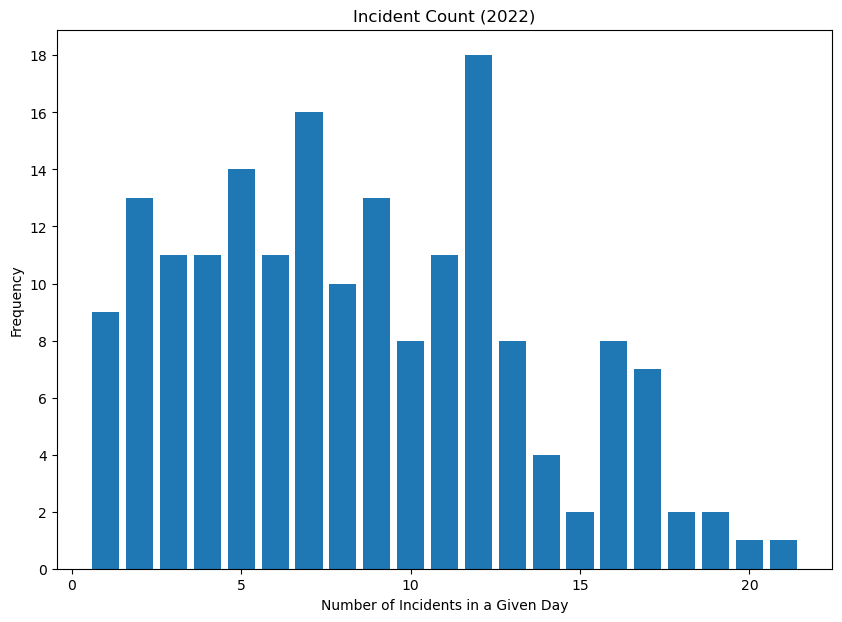

In [5]:
file_2022 = 'Combinder_CAD+TS 2022 All - Modified RCT.xlsm'

df = pd.read_excel(file_2022, sheet_name='CAD_TS_Combined')
df = df.drop_duplicates(subset=['Call ID Number'])
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])
df['Date'] = df['Timestamp'].dt.date

# Group the dataframe by the date and call type, and count the number of accidents per group
grouped = df.groupby([df['Date'], 'Call Type']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 7))

# Calculate the total count of accidents per day
grouped['Total_Count'] = grouped.sum(axis=1)

# Reset the index of the grouped dataframe
grouped.reset_index(inplace=True)

# Group the dataframe by the total count and calculate the frequency
series_2022 = grouped.groupby('Total_Count').size()
# Plot the histogram
#series_2022.plot(kind='bar',width=0.8, label='Original Distribution')
plt.bar(series_2022.index, series_2022, label='Original Distribution')

plt.xlabel('Number of Incidents in a Given Day')
plt.ylabel('Frequency')
plt.title('Incident Count (2022)')
plt.yticks(np.arange(0, 19, step=2))

plt.show()

### Plot Incident Count Frequency Histogram 2018

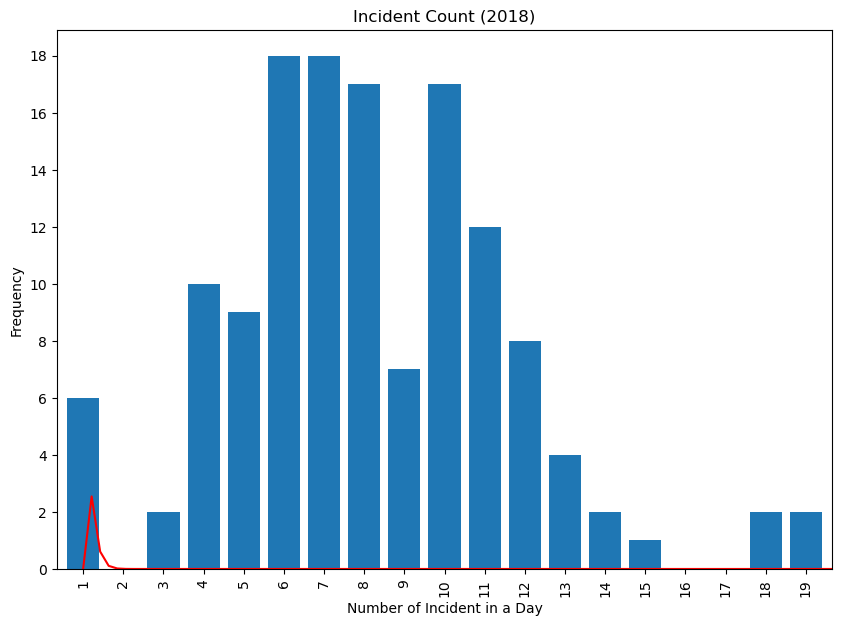

Incident Count:
Average: 0      6
1      0
2      2
3     10
4      9
5     18
6     18
7     17
8      7
9     17
10    12
11     8
12     4
13     2
14     1
15     0
16     0
17     2
18     2
dtype: int64
Mean: 7.105263157894737
Variance: 40.7257617728532


In [58]:
series_2018 = pd.Series([ 6, 0, 2, 10, 9, 18, 18, 17, 7, 17, 12, 8, 4, 2, 1, 0, 0, 2, 2])
fig, ax = plt.subplots(figsize=(10, 7))

series_2018.plot(kind='bar', width=0.8)
plt.xlabel('Number of Incident in a Day')
plt.ylabel('Frequency')
plt.title('Incident Count (2018)')
plt.yticks(np.arange(0, 19, step=2))

plt.xticks(np.arange(0, 19, step=1), np.arange(1, 20, step=1))

x = np.linspace (0, 21, 100) 
y = stats.gamma.pdf(x, a=2, scale=0.1)
plt.plot(x, y, c='r')

plt.show()

print(f'Incident Count:\nAverage: {series_2018}')


mean_value = np.mean(series_2018)
variance_value = np.var(series_2018)
print("Mean:", mean_value)
print("Variance:", variance_value)


In [ ]:
series_2018 = pd.Series([ 6, 0, 2, 10, 9, 18, 18, 17, 7, 17, 12, 8, 4, 2, 1, 0, 0, 2, 2])
fig, ax = plt.subplots(figsize=(10, 7))

series_2018.plot(kind='bar', width=0.8)
plt.xlabel('Number of Incident in a Day')
plt.ylabel('Frequency')
plt.title('Incident Count (2018)')
plt.yticks(np.arange(0, 19, step=2))

plt.xticks(np.arange(0, 19, step=1), np.arange(1, 20, step=1))

x = np.linspace (0, 21, 100) 
y = stats.gamma.pdf(x, a=2, scale=0.1)
plt.plot(x, y, c='r')

plt.show()

print(f'Incident Count:\nAverage: {series_2018}')


mean_value = np.mean(series_2018)
variance_value = np.var(series_2018)
print("Mean:", mean_value)
print("Variance:", variance_value)


In [ ]:
x = np.linspace(0, len(series_2018), 100)
y = stats.gamma.pdf(x, a=4, scale=1.5)
plt.plot(x, y, color='r')


norm = series_2018/np.sum(series_2018)

mean_value = np.mean(norm)
variance_value = np.var(norm)

In [7]:

class IncidentNumber:
    def __init__(self):
        num_selector = random.randint(1, 100)
        
        incident_ranges = [19, 36, 51, 64, 75, 84, 91, 96, 99, 100]
        incident_numbers = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
        
        for i in range(len(incident_ranges)):
            if num_selector <= incident_ranges[i]:
                self.inc_num = incident_numbers[i]
                break
    
    def get_inc_num(self):
        return self.inc_num

### Choose and Plot 10 Sample Daysa

Seed value: 9137734339474138810
10-Day Incident Count [11, 10, 11, 4, 12, 5, 11, 7, 12, 7]


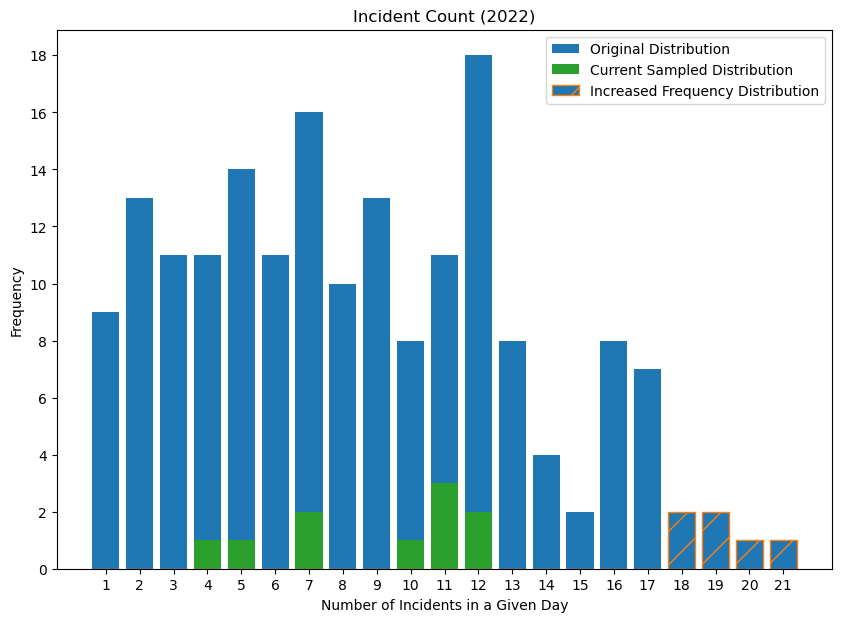

In [96]:
file_2022 = 'Combinder_CAD+TS 2022 All - Modified RCT.xlsm'

df = pd.read_excel(file_2022, sheet_name='CAD_TS_Combined')
df = df.drop_duplicates(subset=['Call ID Number'])
df['Timestamp'] = pd.to_datetime(df['Call Received Time'])
df['Date'] = df['Timestamp'].dt.date

# Group the dataframe by the date and call type, and count the number of accidents per group
grouped = df.groupby([df['Date'], 'Call Type']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 7))

# Calculate the total count of accidents per day
grouped['Total_Count'] = grouped.sum(axis=1)

# Reset the index of the grouped dataframe
grouped.reset_index(inplace=True)
# Group the dataframe by the total count and calculate the frequency
grouped2 = grouped.groupby('Total_Count').size()
# Plot the histogram
#grouped2.plot(kind='bar',width=0.8, label='Original Distribution')
plt.bar(grouped2.index, grouped2, label='Original Distribution')

##############


incident_numbers = grouped2.index
frequencies = [grouped2[i] for i in incident_numbers]

# Set the seed value
seed_value = random.randrange(sys.maxsize)
seed_value = 9137734339474138810
random.seed(seed_value)
print(f"Seed value: {seed_value}")


# Sample the distribution by randomly selecting ten days
sampled_days = random.choices(incident_numbers, weights=frequencies, k=10)

print(f"10-Day Incident Count {sampled_days}")

# Count the occurrences of each accident number in the sampled days
sampled_counts = [sampled_days.count(accident) for accident in incident_numbers]

# Plotting the bar chart
plt.bar(incident_numbers, sampled_counts, color='tab:green', label='Current Sampled Distribution')

inc_freq = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1]
plt.bar(incident_numbers, inc_freq, color='tab:blue', edgecolor='tab:orange', hatch='/' , label='Increased Frequency Distribution')

#plt.bar(inc_freq, color='tab:green', label='Increased Frequency Distribution')


plt.xlabel('Number of Incidents in a Given Day')
plt.ylabel('Frequency')
plt.title('Incident Count (2022)')
plt.yticks(np.arange(0, 19, step=2))
plt.xticks(np.arange(1, 22, step=1))

plt.legend()
plt.show()

### List of Seeds that look well-distributed
Seeds:  9137734339474138810


In [23]:
data_2022

Date
2022-03-01    16.0
2022-03-02     5.0
2022-03-03     8.0
2022-03-04     8.0
2022-03-05    13.0
              ... 
2022-08-27     5.0
2022-08-28     1.0
2022-08-29    10.0
2022-08-30    12.0
2022-08-31     9.0
Name: accident_count, Length: 180, dtype: float64

In [21]:
def print_stats(df, year):
    print(f'Year:{year}')
    print(f'Average: {df.mean()}')
    print(f'Mode: {df.mode()}')
    print(f'Median: {df.median()}\n')

print_stats(data_2018, 2018)
print_stats(data_2022, 2022)

Year:2018
Average: 8.125925925925927
Mode: 0    6.0
1    7.0
Name: accident_count, dtype: float64
Median: 8.0

Year:2022
Average: 8.477777777777778
Mode: 0    12.0
Name: accident_count, dtype: float64
Median: 8.0



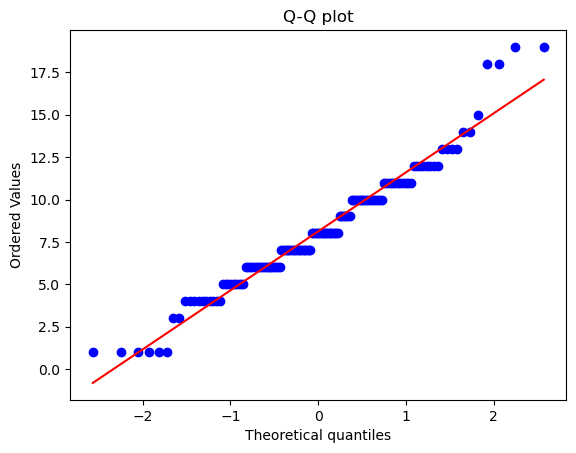

In [30]:
data2018 = data_2018.to_numpy()
stats.probplot(data2018, dist='norm', plot=plt)
plt.title('Q-Q plot')
plt.show()

In [32]:
result = stats.anderson(data2018, dist='norm')
print(f"Anderson-Darling test statistic: {result.statistic}")
print(f"Critical values: {result.critical_values}")
print(f"Significance levels: {result.significance_level}")


Anderson-Darling test statistic: 1.2077600683520018
Critical values: [0.56  0.638 0.765 0.893 1.062]
Significance levels: [15.  10.   5.   2.5  1. ]
